# Introduction

dataset of metadata on movies released on or before July 2017

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast

In [2]:
# load datasets
movie_data = pd.read_csv("tmdb_5000_movies.csv")
credits_data = pd.read_csv("tmdb_5000_credits.csv")

## Preview of the datasets

### movie dataset

In [3]:
# display first few rows of the movie dataset
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movie_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
print("The movie dataset has {} rows and {} columns."
      .format(len(movie_data), len(movie_data.columns))
     )

The movie dataset has 4803 rows and 20 columns.


### credits dataset

In [6]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
print("The credits dataset has {} rows and {} columns."
      .format(len(credits_data), len(credits_data.columns))
     )

The credits dataset has 4803 rows and 4 columns.


## Merge movie and credits dataset

In [8]:
credits_data.drop('title', axis=1, inplace=True)

In [9]:
# join movie and credits data
data = pd.merge(movie_data, credits_data, left_on='id', right_on='movie_id')

In [10]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
data.shape

(4803, 23)

# Data Cleaning

## Unnecessary columns

Dropping columns that provide no useful information to the analysis

In [12]:
data = data.drop(columns=['homepage', 'original_title','original_language', 'id', 'movie_id'])

## Data types

In [14]:
data.dtypes

budget                    int64
genres                   object
keywords                 object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

- convert release date column to datetime

In [15]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

## Lists and Dictionaries

some columns have values stored in lists or dictionaries. I will modify theses columns to contain only information needed for the analysis.

In [16]:

cols = ['genres', 'spoken_languages', 'production_countries', 'production_companies', 'keywords', 'cast', 'crew']
for col in cols:
    data[col] = (
    data[col]
    .fillna("[]")
    .apply(ast.literal_eval)
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    )

## Null values

In [17]:
print("{} out of {} in the revenue column is 0."
      .format(len(data[data['revenue']==0]), len(data['revenue']))
     )

1427 out of 4803 in the revenue column is 0.


In [18]:
print("{} out of {} in the budget column is 0."
      .format(len(data[data['budget']==0]), len(data['budget']))
     )

1037 out of 4803 in the budget column is 0.


The value of 0 is a placeholder for unreported revenue and budget, thus I will change the 0's in these columns to NA

In [19]:
cols = ['revenue', 'budget']
for col in cols:
    data[col] = data[col].replace(0, np.nan)

## New features

### ROI

Add a new column ROI representing the return of investment. Calculated by   
$ROI = \frac{(revenue - cost)}{cost}$

In [20]:
data['ROI'] = (data['revenue'] - data['budget'])/data['budget']

### release year and month

In [67]:
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).strftime("%b")
data = data.drop(columns=['release_date'])

In [68]:
data.head()

,budget,genres,keywords,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,ROI,year,month
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",10.763566,2009.0,Dec
1,300000000.0,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],9.610000e+08,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2.203333,2007.0,May
2,245000000.0,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2.594590,2015.0,Oct
3,250000000.0,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],1.084939e+09,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",3.339756,2012.0,Jul
4,260000000.0,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2.841391e+08,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",0.092843,2012.0,Mar


# Data exploration

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Overview

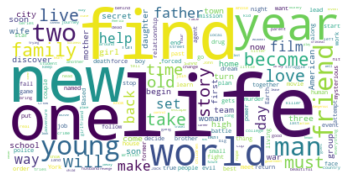

In [24]:
stopwords = set(STOPWORDS)
data['overview'] = data['overview'].astype('str')
overview_text = " ".join(data['overview'])
keywords_cloud = WordCloud(stopwords=stopwords,
                           collocations=False,
                           background_color="white").generate(overview_text)
plt.imshow(keywords_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
import seaborn as sns

## Runtime

In [26]:
data['runtime'].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

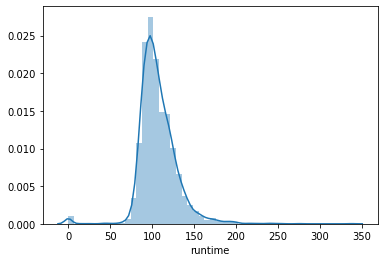

In [27]:
sns.distplot(data.runtime)

### Compare runtime against budget, revenue and ROI

In [36]:
budget_data = data[(data['budget']>1e6 )][['title', 'budget', 'revenue','ROI', 'runtime']]

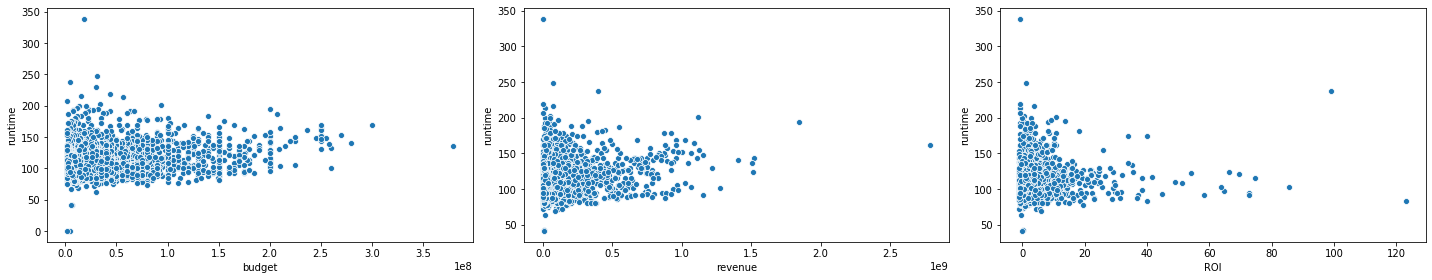

In [39]:
figure, ax=plt.subplots(1,3)
figure.set_size_inches(20, 4)
sns.scatterplot(x='budget', y='runtime', data=budget_data, ax=ax[0])
sns.scatterplot(x='revenue', y='runtime', data=budget_data, ax=ax[1])
sns.scatterplot(x='ROI', y='runtime', data=budget_data, ax=ax[2])
figure.tight_layout()

## Revenue

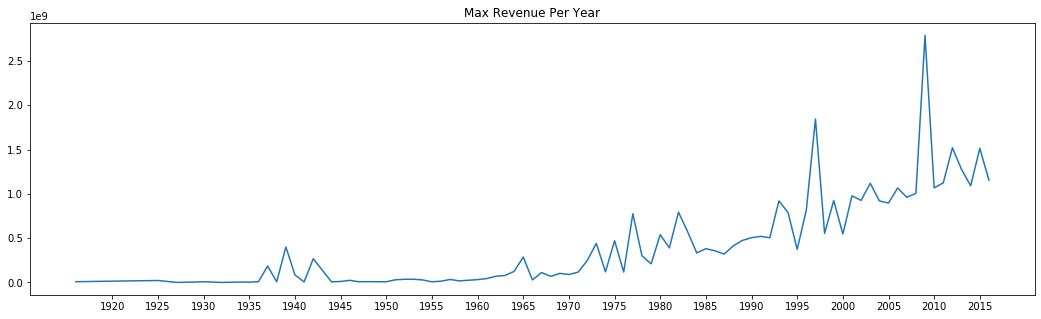

In [40]:
revenue_data = (data[data['revenue'].notnull()][['revenue', 'year']]
                .groupby('year')['revenue']
                .max()
               )
plt.figure(figsize=(18, 5))
plt.xticks(np.arange(1920, 2018, 5))
plt.plot(revenue_data)
plt.title('Max Revenue Per Year')
plt.show()

## Movie success

### Highest Return of Investment movies

Sort movie data by ROI in descending order and display the top 10 movies, considering movies with budget greater than 1 million dollars.

In [41]:
top_ROI = (data[(data['budget']>1e6)][['title', 'budget', 'revenue', 'ROI', 'year']]
           .sort_values(by='ROI', ascending=False)
          )
top_ROI.head(10)

,title,budget,revenue,ROI,year
4259,Snow White and the Seven Dwarfs,1488423.0,184925486.0,123.242561,1937.0
3813,Gone with the Wind,4000000.0,400176459.0,99.044115,1939.0
4291,Saw,1200000.0,103911669.0,85.593058,2004.0
2967,E.T. the Extra-Terrestrial,10500000.0,792910554.0,74.515291,1982.0
3593,My Big Fat Greek Wedding,5000000.0,368744044.0,72.748809,2002.0
3824,The Full Monty,3500000.0,257850122.0,72.671463,1997.0
2912,Star Wars,11000000.0,775398007.0,69.490728,1977.0
2809,Jaws,7000000.0,470654000.0,66.236286,1975.0
3202,Crocodile Dundee,5000000.0,328203506.0,64.640701,1986.0
4224,Insidious,1500000.0,97009150.0,63.672767,2010.0


### Lowest Return of Investment movies

Using the above dataframe with an additional condition of revenue being more than 10 thousand, display 10 movies with the lowest ROI value.

In [42]:
top_ROI[(top_ROI['revenue']>1e4)].sort_values(by='ROI', ascending=True).head(10)

,title,budget,revenue,ROI,year
2901,5 Days of War,20000000.0,17479.0,-0.999126,2011.0
1101,Foodfight!,65000000.0,73706.0,-0.998866,2012.0
2651,The Good Night,15000000.0,20380.0,-0.998641,2007.0
2650,All The Queen's Men,15000000.0,23000.0,-0.998467,2001.0
3120,Strangerland,10000000.0,17472.0,-0.998253,2015.0
2714,Margaret,14000000.0,46495.0,-0.996679,2011.0
1672,1911,30000000.0,108348.0,-0.996388,2011.0
3815,Major Dundee,3800000.0,14873.0,-0.996086,1965.0
3115,"An Alan Smithee Film: Burn, Hollywood, Burn",10000000.0,45779.0,-0.995422,1998.0
3399,The Boondock Saints,6000000.0,30471.0,-0.994922,1999.0


## production companies

In [43]:
# extract all values from production_companies column
prod_company_stack = (data['production_companies']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )
prod_company_stack.name = 'company'

# get frequency of each production_company
production_freq = (prod_company_stack
              .value_counts()
              .rename_axis('production_company')
              .reset_index(name='movie_count')
             )

prod_df = data.drop('production_companies', axis=1).join(prod_company_stack)
comp_revenue_sum = pd.DataFrame(prod_df
                                .groupby(by=['company'])['revenue']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

In [46]:
comp_revenue_sum.head(10)

,company,revenue
0,Warner Bros.,4.915575e+10
1,Universal Pictures,4.258847e+10
2,Paramount Pictures,4.087852e+10
3,Twentieth Century Fox Film Corporation,3.935715e+10
4,Walt Disney Pictures,2.868326e+10
5,Columbia Pictures,2.859963e+10
6,New Line Cinema,1.944487e+10
7,Amblin Entertainment,1.609084e+10
8,DreamWorks SKG,1.438453e+10
9,Dune Entertainment,1.379750e+10


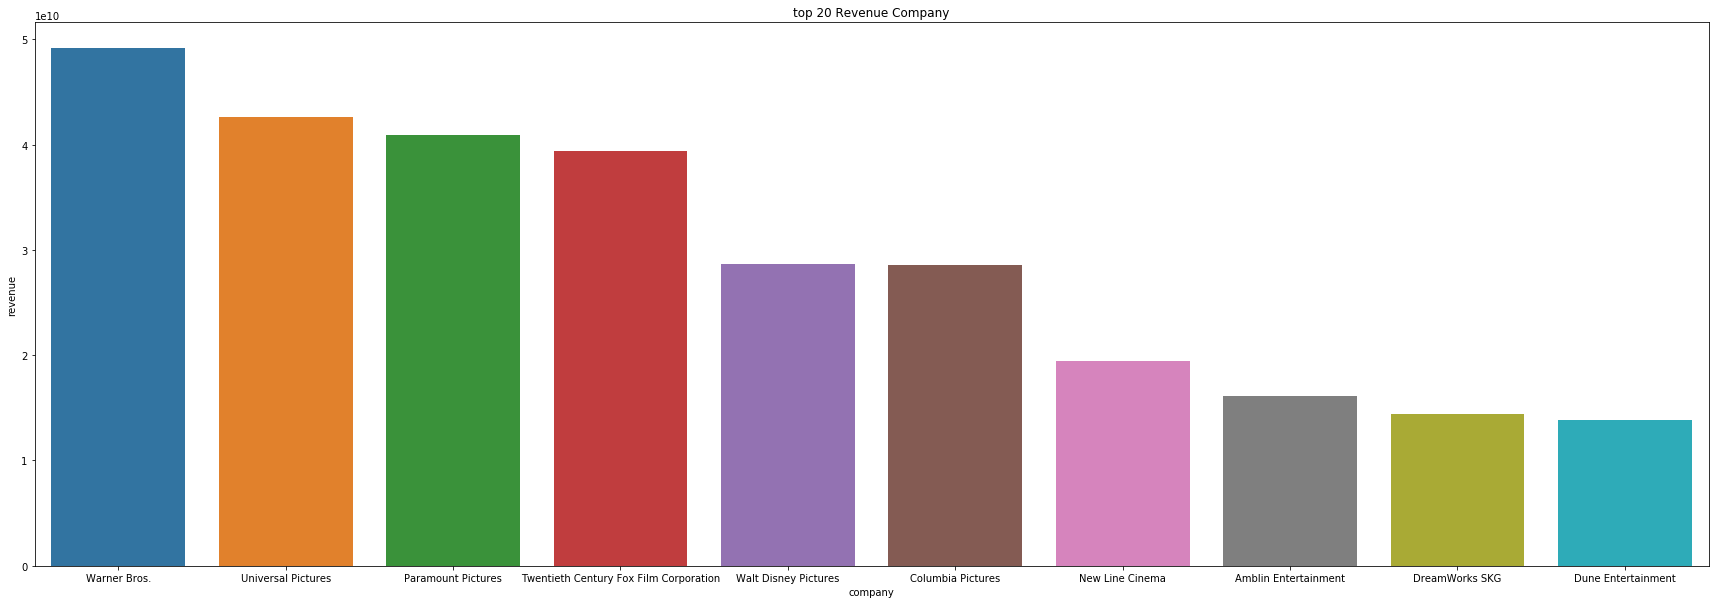

In [47]:
plt.figure(figsize=(30, 10))
sns.barplot(data=comp_revenue_sum.head(10),
            x='company',
            y='revenue').set_title('top 20 Revenue Company')
plt.show()

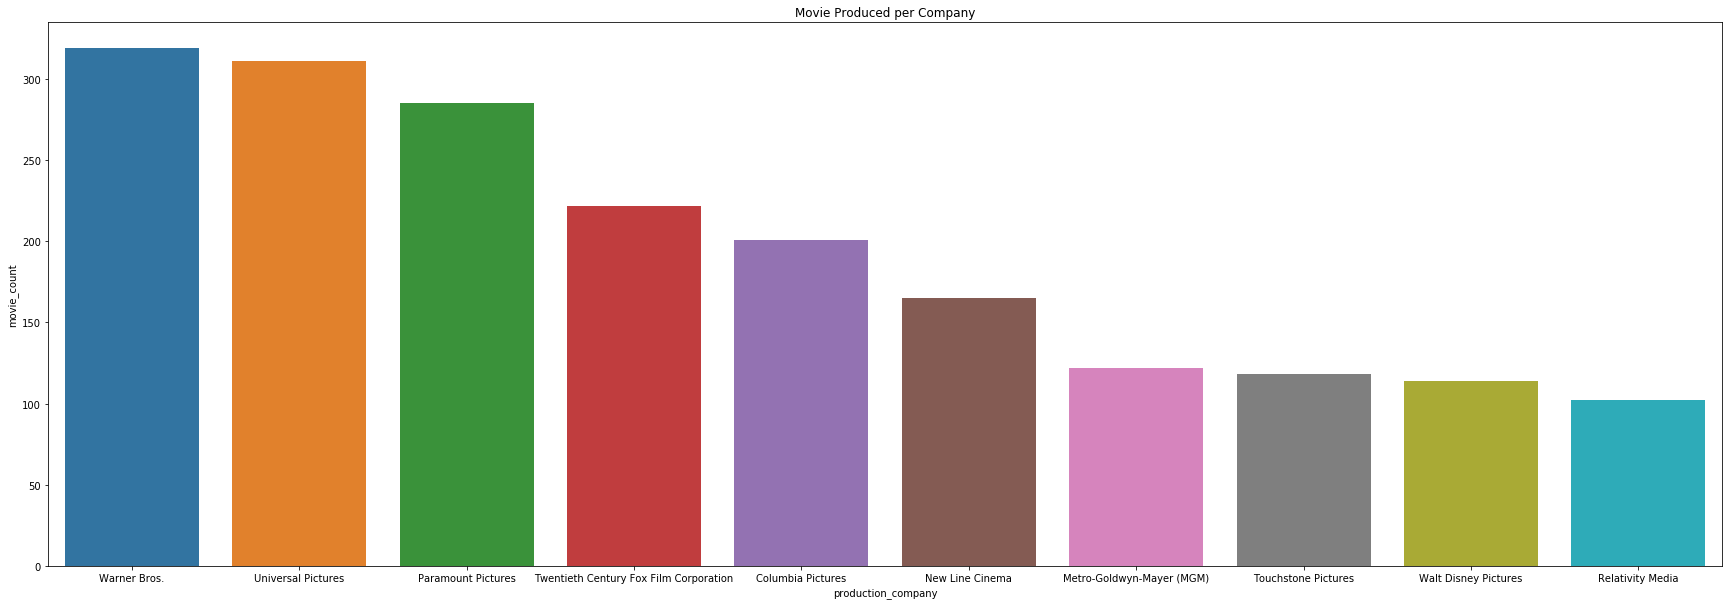

In [66]:
plt.figure(figsize=(30, 10))
sns.barplot(data=production_freq.head(10),
            x='production_company',
            y='movie_count').set_title('Movie Produced per Company')
plt.show()

## Genres

In [49]:
# extract all values from genres column
genre_stack = (data['genres']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )

# get frequency of each genre
genre_freq = (genre_stack
              .value_counts()
              .rename_axis('genre')
              .reset_index(name='movie_count')
             )

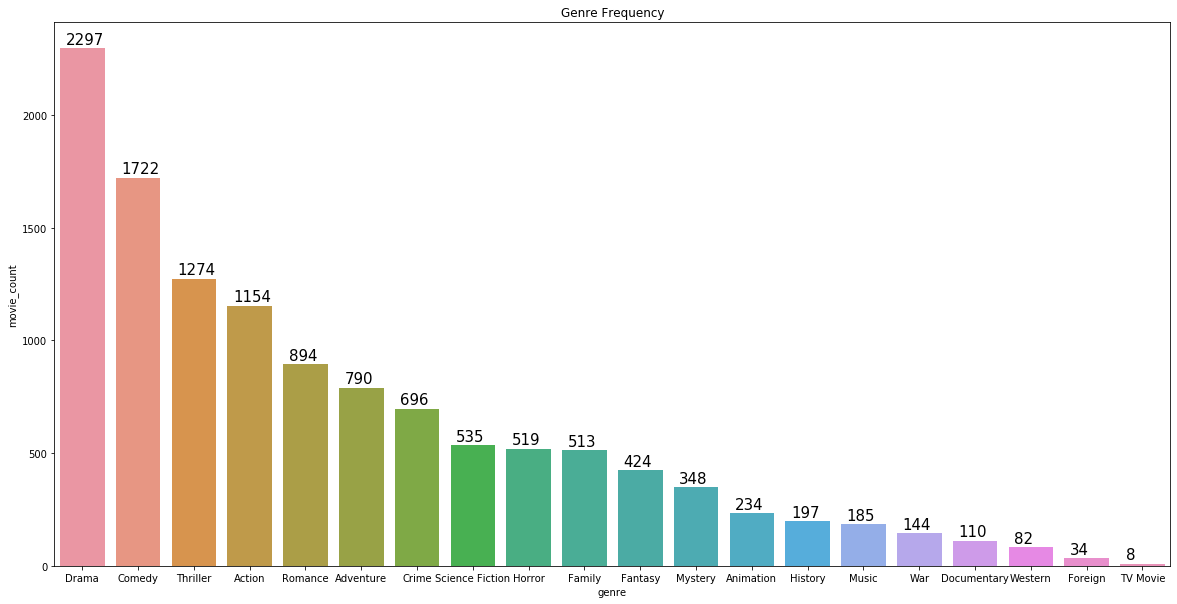

In [51]:
plt.figure(figsize=(20, 10))
x =genre_freq['genre'].values.tolist()
y=genre_freq['movie_count'].values.tolist()
sns.barplot(data=genre_freq, x='genre', y='movie_count').set_title('Genre Frequency')
for a,b in enumerate(y):
    plt.text(a - 0.3, b + 20, str(b), fontsize=15)
plt.show()

### release year and month

### Genre Revenue

In [52]:
genre_stack = (data['genres']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )
genre_stack.name = 'genre'

genre_df = data.drop('genres', axis=1).join(genre_stack)
genre_rev = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['revenue']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

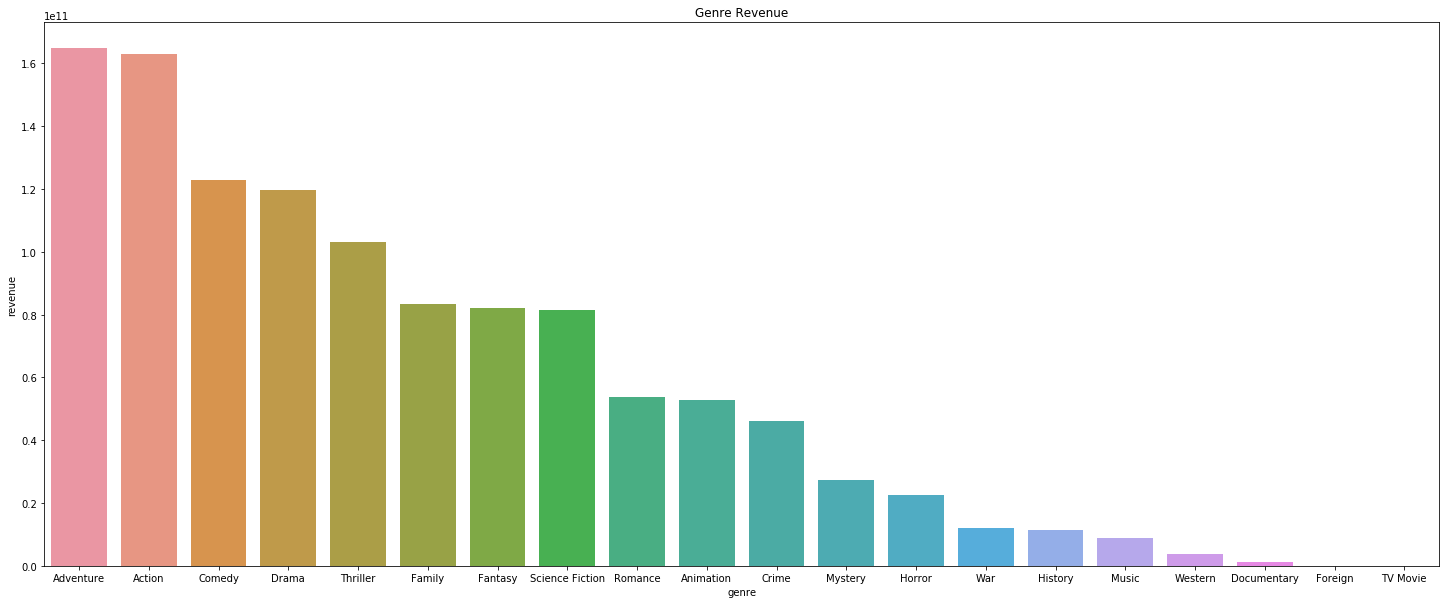

In [57]:
plt.figure(figsize=(25, 10))
sns.barplot(data=genre_rev, x='genre', y='revenue').set_title('Genre Revenue')
plt.show()

### Genre Budget

In [69]:
genre_budget = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['budget']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

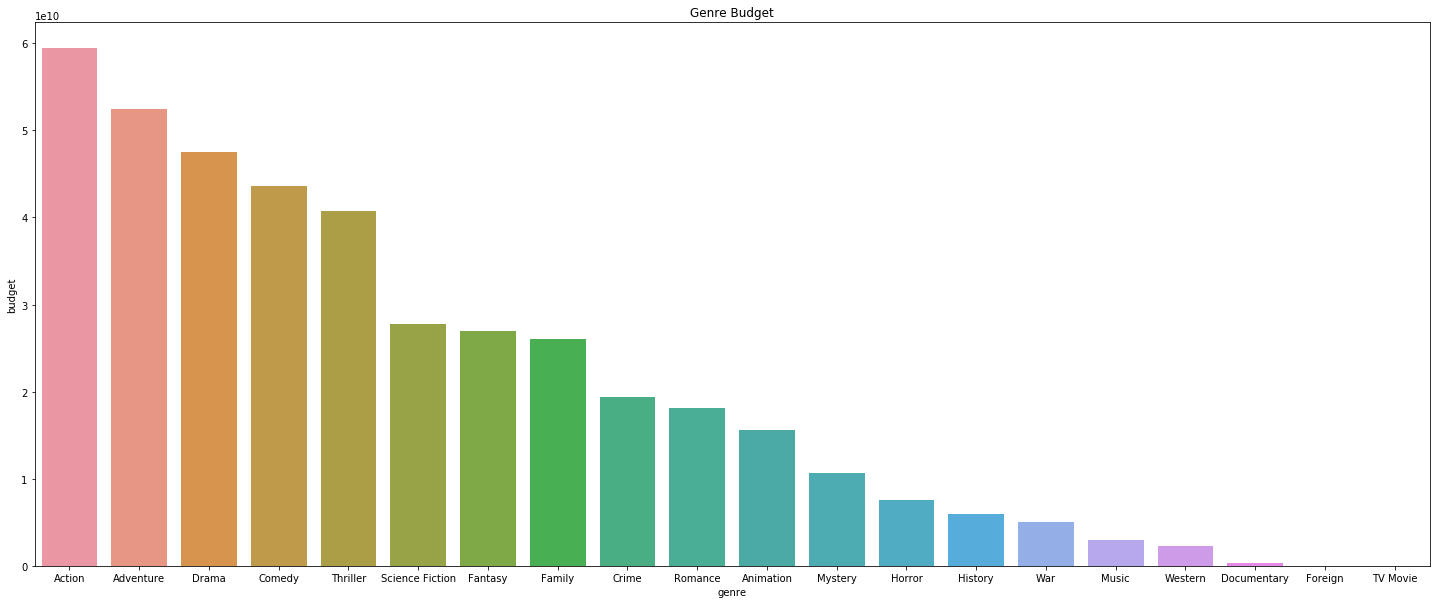

In [70]:
plt.figure(figsize=(25, 10))
sns.barplot(data=genre_budget, x='genre', y='budget').set_title('Genre Budget')
plt.show()